# Congestion proyect 


You are provided with historical data (**697 days**) on the level of congestion in 40 European cities. My goal is to develop a model that predicts, as accurately as possible, the congestion level for the next 133 days. 

A set of additional indicators for all 830 days is also included in the program in order to help you construct a model.

The congestion level of a country is based on diferent parameters which are provided on the dataset. For the authorities of a country or city to be able to adapt according to the amount of **congestion on the cities**, this study will provide good information for us to be able to plan in the future. 

The process that i will be using is the following:
    
    - Study missing values and visualazing interesting variables.
    - Processing missing values
    - Decition making for reducing and integrating variable into the dataset for the future model.
    - Data process and adquisition of the final dataframe.
    - Modelling
    
Following the process will help the reader to be able to undertand the steps that i will be following during the study.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(r'C:\Users\34677\Desktop\Master\Modelos de clasificacion\congestion\train.csv')

df.head(5)

,country,city,date,congestion,driving,transit,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,commercial,utilities,other
0,Austria,Graz,2019-12-30,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,50,1
1,Austria,Vienna,2019-12-30,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,51,1
2,Belgium,Brussels,2019-12-30,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,50,1
3,Belgium,Charleroi,2019-12-30,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,52,1
4,Czechia,Brno,2019-12-30,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112,51,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27880 entries, 0 to 27879
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                27880 non-null  object 
 1   city                   27880 non-null  object 
 2   date                   27880 non-null  object 
 3   congestion             27880 non-null  int64  
 4   driving                27200 non-null  float64
 5   transit                14290 non-null  float64
 6   walking                27218 non-null  float64
 7   retail_and_recreation  25975 non-null  float64
 8   grocery_and_pharmacy   25980 non-null  float64
 9   parks                  25215 non-null  float64
 10  transit_stations       25994 non-null  float64
 11  workplaces             25988 non-null  float64
 12  residential            26000 non-null  float64
 13  commercial             27880 non-null  int64  
 14  utilities              27880 non-null  int64  
 15  ot

In [3]:
df['country'].unique()

array(['Austria', 'Belgium', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden'],
      dtype=object)

In [4]:
df['city'].unique()

array(['Graz', 'Vienna', 'Brussels', 'Charleroi', 'Brno', 'Prague',
       'Copenhagen', 'Tallinn', 'Helsinki', 'Grenoble', 'Lille', 'Paris',
       'Berlin', 'Bremen', 'Cologne', 'Dresden', 'Munich', 'Athens',
       'Budapest', 'Cork', 'Dublin', 'Bologna', 'Catania', 'Milan',
       'Rome', 'Eindhoven', 'Groningen', 'Krakow', 'Poznan', 'Lisbon',
       'Porto', 'Bucharest', 'Alicante', 'Barcelona', 'Madrid', 'Malaga',
       'Seville', 'Gothenburg', 'Malmo', 'Stockholm'], dtype=object)

In [5]:
print(((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False))
print(len(df.index))

transit                  48.744620
parks                     9.558824
retail_and_recreation     6.832855
grocery_and_pharmacy      6.814921
workplaces                6.786227
transit_stations          6.764706
residential               6.743185
driving                   2.439024
walking                   2.374462
country                   0.000000
city                      0.000000
date                      0.000000
congestion                0.000000
commercial                0.000000
utilities                 0.000000
other                     0.000000
dtype: float64
27880


In [6]:
for x in range(18):
    country = df[df['country']== df['country'].unique()[x]]
    
    print('\033[1m'+ df['country'].unique()[x] +'\033[0m')
    print('\n')
    print(((country.isnull().sum()/country.shape[0])*100).sort_values(ascending=False))
    print(len(country.index))
    print('\n')

Austria


transit                  100.000000
parks                      8.106169
grocery_and_pharmacy       7.388809
retail_and_recreation      6.743185
transit_stations           6.743185
workplaces                 6.743185
residential                6.743185
driving                    2.439024
walking                    2.439024
country                    0.000000
city                       0.000000
date                       0.000000
congestion                 0.000000
commercial                 0.000000
utilities                  0.000000
other                      0.000000
dtype: float64
1394


Belgium


parks                    8.464849
retail_and_recreation    6.743185
grocery_and_pharmacy     6.743185
transit_stations         6.743185
workplaces               6.743185
residential              6.743185
driving                  2.439024
transit                  2.295552
walking                  2.295552
country                  0.000000
city                     0.000000
date    

In [7]:
df.describe()

,congestion,driving,transit,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,commercial,utilities,other
count,27880.000000,27200.000000,14290.000000,27218.000000,25975.000000,25980.000000,25215.000000,25994.000000,25988.000000,26000.000000,27880.000000,27880.000000,27880.000000
mean,23.625897,2.140821,24.555223,1.154557,-28.101482,-4.531601,19.156098,-32.297569,-27.809720,8.335231,100.016320,51.666069,0.976040
std,13.070731,38.930643,101.876852,53.957496,24.406120,20.504869,53.365451,21.583234,20.414158,8.190635,10.000049,2.243244,4.745785
min,0.000000,-93.830000,-95.890000,-97.570000,-98.000000,-96.000000,-97.000000,-94.000000,-93.000000,-14.000000,60.000000,50.000000,-776.000000
25%,14.000000,-23.662500,-30.627500,-38.377500,-43.000000,-13.000000,-15.000000,-46.000000,-40.000000,3.000000,93.000000,51.000000,1.000000
50%,21.000000,1.620000,1.600000,-4.860000,-24.000000,-3.000000,10.000000,-32.000000,-28.000000,7.000000,100.000000,51.000000,1.000000
75%,32.000000,27.020000,42.715000,32.550000,-10.000000,6.000000,46.000000,-18.000000,-14.000000,13.000000,107.000000,52.000000,1.000000
max,137.000000,240.210000,842.680000,311.440000,54.000000,208.000000,356.000000,69.000000,71.000000,47.000000,142.000000,100.000000,93.000000


#### A small data expansion
For the data expansion to not damage the rest of the process, some of them will be done at this point of the project. But the biggest interaction will be done latly.

In [8]:
df_datos1 = pd.read_csv(r'C:\Users\34677\Desktop\Master\Modelos de clasificacion\congestion\train.csv')
# Using dinamic table to adquire a few new variables
df_datos=df_datos1.pivot_table(index='city',values='congestion',aggfunc='mean')
# Making the table by hand
mean_congestion=df_datos['congestion'].to_numpy()
city = df_datos.index.to_numpy()
leassure_port = [1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0]
trading_port = [1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0]
crime_index = [24.69,58.34,54.52,45.62,49.43,51.97,18.04,54.59,28.18,31.44,63.86,68.01,44.54,26.18,34.14,
               29.14,57.80,22.81,54.17,26.29,62.54,22.13,22.09,25.68,51.87,25.03,
               25.62,22.00,55.77,52.72,13.25,61.22,28.39,25.36,37.52,52.93,51.47,22.77,23.76,23.76]
living_cost = [1213,1440,1916,946.7,930.1,902.1, 661.6,1713,562.2,614.2,727.8,1374,972.1,1143.4,932.0,850.6,999.7,
             888.1,847.6,993.2,840.2,1.017,851.7,565.8,865.2,708.9,1054,684.7,
             786.4,1023.3, 971.1,1064.5,608.3,514.7,808.5,912.9,689.4,974.4,899.2,873.0]
average_salary = [52360,16235,43820,70077,37038,52640,26964,61334,16033.94,17374,33294,64389,51323,
                  31934,39000,40445,40000,68786,38803.56,19900,39400,40000,48952,20167.28,42194,52570,44660,32315,
                  50613.78,41265,54040,35980,30875,18465.52,23489.9,38035,32315,54087.32,16100,39200]
df_datos=pd.DataFrame(list(zip(city,mean_congestion,leassure_port,trading_port,crime_index,living_cost,average_salary)),columns=['city','mean_congestion','leassure_port','trading_port','crime_index','living_cost','average_salary'])
df_array=df_datos.to_numpy()
len(living_cost)

40

In [9]:
new_data=[]

for x in range(len(df['city'])):
    for y in range(len(df_array)):
        if df['city'][x] == df_array[y][0]:
            new_data.append(df_array[y][1:])

In [10]:
new_data_end=pd.DataFrame(new_data, columns =('mean_congestion', 'leassure_port', 'trading_port',
       'crime_index', 'living_cost', 'average_salary'))
new_data_end
df = pd.concat([df,new_data_end],axis=1)

#### End of the data expansion.

In [11]:
df.corr()['congestion'].sort_values(ascending=False,key=abs)

congestion               1.000000
mean_congestion          0.496232
retail_and_recreation    0.393153
transit_stations         0.360747
grocery_and_pharmacy     0.347150
driving                  0.321185
walking                  0.279785
leassure_port           -0.220887
average_salary          -0.183198
transit                  0.164738
residential             -0.153876
trading_port            -0.133083
parks                    0.080248
living_cost             -0.078308
workplaces               0.049512
commercial              -0.007462
crime_index             -0.001942
utilities                0.001095
other                   -0.000746
Name: congestion, dtype: float64

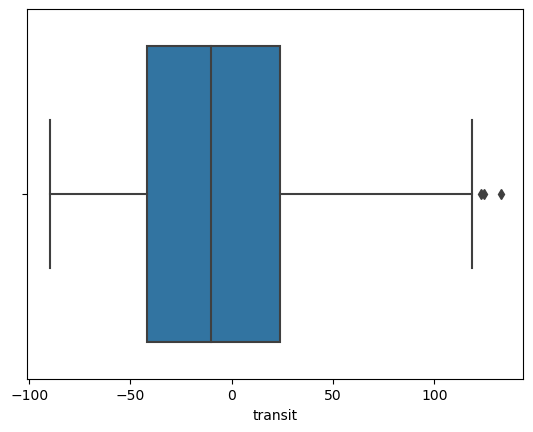

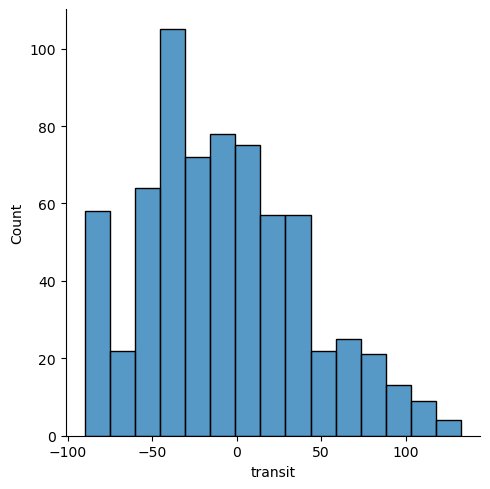

In [12]:
Country1=df[df['country']=='Hungary']
sns.boxplot(data=Country1 ,x='transit')
sns.displot(data=Country1 ,x='transit')

<AxesSubplot:xlabel='transit', ylabel='congestion'>

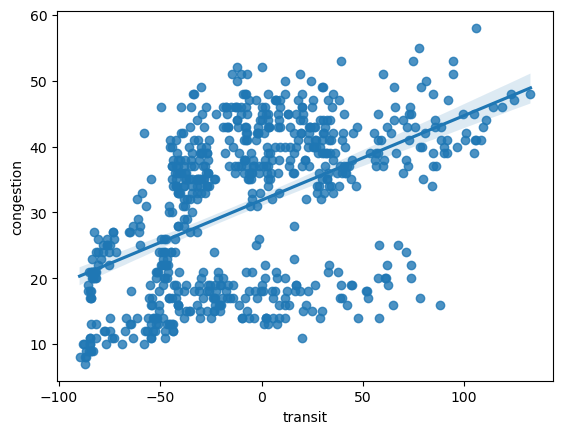

In [13]:
sns.regplot(data=Country1, x="transit", y="congestion")

## Conclusions of the missing values study

After looking at the missing values, we can see that the variable transit is not in a good shape for modelling. there are **more than 50% of missing values** and a lot of countries which dont even have a single value for reference. 

We can take 3 decition: Leaving the variable transit but eliminating the missing cells, leaving the variable and stimating the missing cells and eliminating the variable from the dataframe.

If we decide to take out all of the missing values from the dataframe we will end up with half of the data we initially had. If we replace the missing data with an estimated number or a 0, the final result will be damaged. 

The variable has an incredible **disperse shape** and a **correlation lower than 0,2** with our independent variable. We have the existance of **outlayers** and even if the distribution is normal, it has a **shift to the left** which can shift the final model aswell. Due to this reasons, i have decided to take it out of the dataframe. 

In [14]:
df_new = df.drop(['transit'],axis=1)
df['city']

0              Graz
1            Vienna
2          Brussels
3         Charleroi
4              Brno
            ...    
27875        Malaga
27876       Seville
27877    Gothenburg
27878         Malmo
27879     Stockholm
Name: city, Length: 27880, dtype: object

<AxesSubplot:xlabel='congestion', ylabel='Count'>

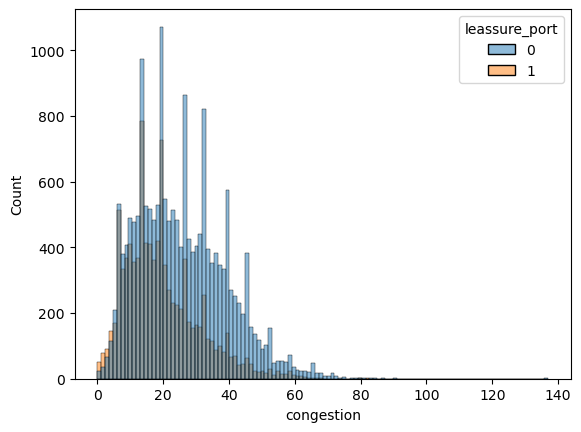

In [15]:
sns.histplot(data = df_new, x = 'congestion', hue = 'leassure_port')

<AxesSubplot:xlabel='congestion', ylabel='Count'>

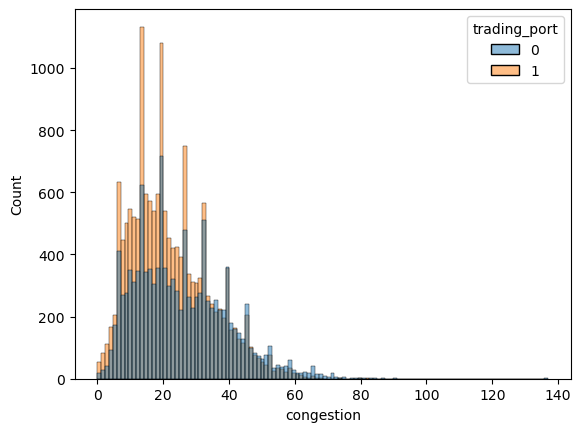

In [16]:
sns.histplot(data = df_new, x = 'congestion', hue = 'trading_port')

<AxesSubplot:xlabel='crime_index', ylabel='Count'>

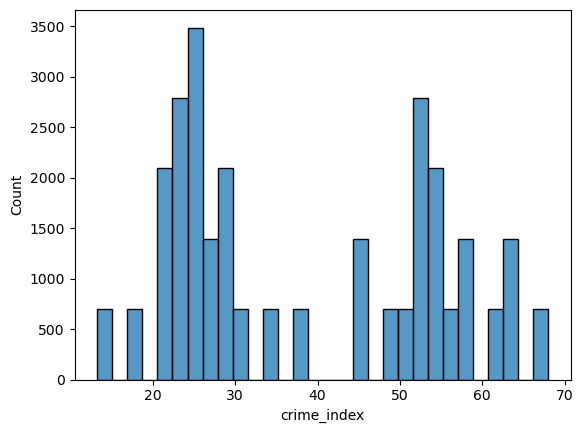

In [17]:
sns.histplot(data=df_new, x="crime_index")

In [18]:
from sklearn.preprocessing import MinMaxScaler


def minmax_norm(df_input):
    return (df_new['crime_index'] - df_new['crime_index'].min()) / ( df_new['crime_index'].max() - df_new['crime_index'].min())

df_minmax_norm = minmax_norm(df_new['crime_index'])

print(df_minmax_norm)

0        0.238130
1        0.191928
2        0.754931
3        1.000000
4        0.087473
           ...   
27875    0.159788
27876    0.697955
27877    0.747261
27878    0.776479
27879    0.173850
Name: crime_index, Length: 27880, dtype: float64


<AxesSubplot:xlabel='average_salary', ylabel='Count'>

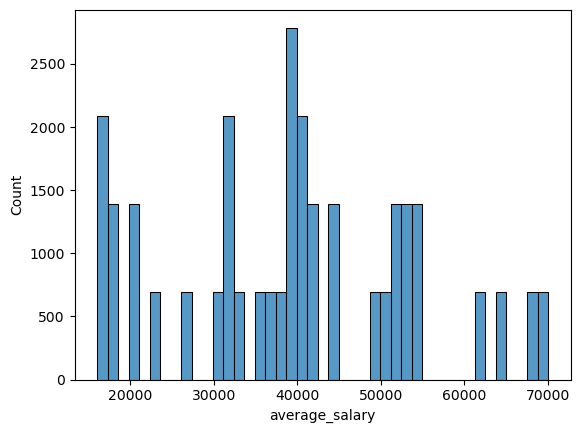

In [19]:
sns.histplot(data=df_new, x="average_salary")

<AxesSubplot:xlabel='living_cost', ylabel='Count'>

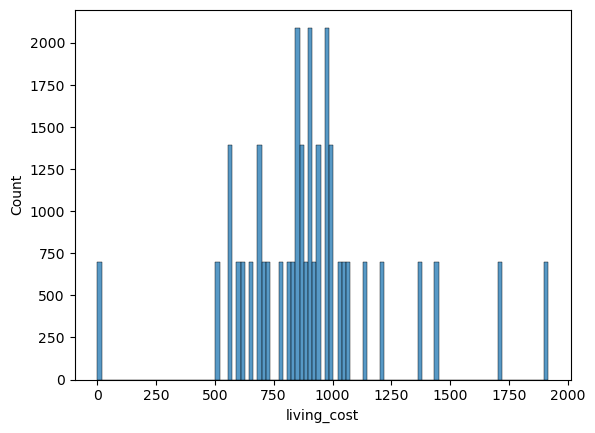

In [20]:
sns.histplot(data=df_new, x="living_cost")

#### Process for the missing values

Missing values are only able to be replace if its a numerical dataframe. For this procedure and to be able to achieve the best posible dataframe, i will drop columns with object values and change the variable city from non_numerica categorical value to a numeric categorical variable.

In [21]:
# Start by changing the variable city
df_new['city'] = df_new["city"].astype('category').cat.codes

# Devide into numeric and non_numeric data
df_numeric = df_new.drop(['congestion','date','country'],axis=1)
df_object = df_new.drop(['driving',
       'walking', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential', 'commercial',
       'utilities', 'other','mean_congestion', 'leassure_port', 'trading_port',
       'crime_index', 'living_cost', 'average_salary'],axis=1)

In [22]:
# Due to the fact that all variable has a very high starnd deviation, i will be using the positional value median to fill 
# the missing values of the numerical variables.
from sklearn.impute import SimpleImputer
df_imputed=pd.DataFrame()
for x in range(len(df['city'].unique())):
    cities = df_numeric[df_numeric['city']== df_numeric['city'].unique()[x]]
    simple_impute = SimpleImputer(missing_values=np.nan,strategy='median',verbose=0)
    New_city=simple_impute.fit_transform(cities)
    New_city=pd.DataFrame(New_city,columns=(df_numeric.columns))
    df_imputed=pd.concat([df_imputed,New_city],axis=0)
df_imputed

,city,driving,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,commercial,utilities,other,mean_congestion,leassure_port,trading_port,crime_index,living_cost,average_salary
0,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,-27.0,4.0,97.0,50.0,1.0,23.022956,0.0,0.0,26.29,993.2,19900.00
1,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,-27.0,4.0,85.0,51.0,1.0,23.022956,0.0,0.0,26.29,993.2,19900.00
2,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,-27.0,4.0,108.0,51.0,1.0,23.022956,0.0,0.0,26.29,993.2,19900.00
3,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,-27.0,4.0,102.0,54.0,1.0,23.022956,0.0,0.0,26.29,993.2,19900.00
4,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,-27.0,4.0,92.0,51.0,1.0,23.022956,0.0,0.0,26.29,993.2,19900.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,37.0,49.250,69.410,-8.0,-7.0,4.0,-26.0,-32.0,8.0,99.0,51.0,1.0,25.149211,1.0,1.0,22.77,974.4,54087.32
693,37.0,53.020,77.350,-1.0,-5.0,8.0,-18.0,-2.0,1.0,92.0,51.0,1.0,25.149211,1.0,1.0,22.77,974.4,54087.32
694,37.0,38.090,10.110,-2.0,-8.0,-2.0,-24.0,-4.0,1.0,95.0,51.0,1.0,25.149211,1.0,1.0,22.77,974.4,54087.32
695,37.0,24.190,8.370,-14.0,-5.0,-5.0,-34.0,-33.0,10.0,83.0,50.0,1.0,25.149211,1.0,1.0,22.77,974.4,54087.32


In [23]:
# Match the tables of the numerical data and the non numerical data
df_object_final=pd.DataFrame()

# Formulating the index for the future submissions in kaggle

df_index = df['city'].astype(str)+' '+df['date'].astype(str)
df_new_index = pd.DataFrame(df_index,columns={'fecha_hora'})

df_object=pd.concat([df_object,df_new_index],axis=1)

for x in range(len(df['city'].unique())):
    df_object_semifinal = df_object[df_object['city']== df_object['city'].unique()[x]]
    df_object_final=pd.concat([df_object_final,df_object_semifinal],axis=0)
df_new_index=df_object_final['fecha_hora']

df_object_final=df_object_final.drop(['city','fecha_hora'],axis=1)

# Reset index
df_object_final.reset_index(inplace=True, drop=True)
df_imputed.reset_index(inplace=True, drop=True)

# Merge the imputed dataframe and the non numerical dataframe to obtain the full table.
df_treated=pd.concat([df_object_final,df_imputed],axis=1)
df_treated

,country,date,congestion,city,driving,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,...,residential,commercial,utilities,other,mean_congestion,leassure_port,trading_port,crime_index,living_cost,average_salary
0,Austria,2019-12-30,23,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,4.0,97.0,50.0,1.0,23.022956,0.0,0.0,26.29,993.2,19900.00
1,Austria,2019-12-31,12,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,4.0,85.0,51.0,1.0,23.022956,0.0,0.0,26.29,993.2,19900.00
2,Austria,2020-01-01,8,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,4.0,108.0,51.0,1.0,23.022956,0.0,0.0,26.29,993.2,19900.00
3,Austria,2020-01-02,20,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,4.0,102.0,54.0,1.0,23.022956,0.0,0.0,26.29,993.2,19900.00
4,Austria,2020-01-03,20,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,4.0,92.0,51.0,1.0,23.022956,0.0,0.0,26.29,993.2,19900.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27875,Sweden,2021-11-26,38,37.0,49.250,69.410,-8.0,-7.0,4.0,-26.0,...,8.0,99.0,51.0,1.0,25.149211,1.0,1.0,22.77,974.4,54087.32
27876,Sweden,2021-11-27,28,37.0,53.020,77.350,-1.0,-5.0,8.0,-18.0,...,1.0,92.0,51.0,1.0,25.149211,1.0,1.0,22.77,974.4,54087.32
27877,Sweden,2021-11-28,27,37.0,38.090,10.110,-2.0,-8.0,-2.0,-24.0,...,1.0,95.0,51.0,1.0,25.149211,1.0,1.0,22.77,974.4,54087.32
27878,Sweden,2021-11-29,34,37.0,24.190,8.370,-14.0,-5.0,-5.0,-34.0,...,10.0,83.0,50.0,1.0,25.149211,1.0,1.0,22.77,974.4,54087.32


In [24]:
# Tenemos una variable objeto que son los paises. Los paises nos dan la misma informacion que las ciudades, sin embargo
# de momento lo vamos a dejar por si podemos usarlo para añadir informacion a la tabla.

# Pasamos la variable objeto date a data time que es su formato real.

df_treated['date']=pd.to_datetime(df_treated['date'])

df_treated['year']= df_treated['date'].dt.year
df_treated['Week_days']= df_treated['date'].dt.day_name()
df_treated['dayofyear']= df_treated['date'].dt.dayofyear
df_treated['month']= df_treated['date'].dt.month

df_days=pd.get_dummies(df_treated['Week_days'],columns=['name'])
df_treated=df_treated.drop(['Week_days'],axis=1)
df_treated=pd.concat([df_treated,df_days],axis=1)
df_treated

,country,date,congestion,city,driving,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,...,year,dayofyear,month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Austria,2019-12-30,23,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,2019,364,12,0,1,0,0,0,0,0
1,Austria,2019-12-31,12,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,2019,365,12,0,0,0,0,0,1,0
2,Austria,2020-01-01,8,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,2020,1,1,0,0,0,0,0,0,1
3,Austria,2020-01-02,20,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,2020,2,1,0,0,0,0,1,0,0
4,Austria,2020-01-03,20,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,2020,3,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27875,Sweden,2021-11-26,38,37.0,49.250,69.410,-8.0,-7.0,4.0,-26.0,...,2021,330,11,1,0,0,0,0,0,0
27876,Sweden,2021-11-27,28,37.0,53.020,77.350,-1.0,-5.0,8.0,-18.0,...,2021,331,11,0,0,1,0,0,0,0
27877,Sweden,2021-11-28,27,37.0,38.090,10.110,-2.0,-8.0,-2.0,-24.0,...,2021,332,11,0,0,0,1,0,0,0
27878,Sweden,2021-11-29,34,37.0,24.190,8.370,-14.0,-5.0,-5.0,-34.0,...,2021,333,11,0,1,0,0,0,0,0


### First data implementation.

We added 3 new variables:
- The first variable tells us the year where the measure was taken
- The second is a categorical variable telling us the weekday from monday to sunday which has a big relevance on the congestion in a city
- The third is a measure of year days which i will be using has a measure of time passing during the three years.
- The fourth variable will be used to achieve the seasons of the year in which we will be working and that is a good variable that can have a big impact on the congestion of the country.

In [25]:
from pandas.tseries.holiday import *
from pandas.tseries.offsets import CustomBusinessDay

class EsBusinessCalendar(AbstractHolidayCalendar):
   rules = [
     Holiday('Año Nuevo', month=1, day=1, observance=sunday_to_monday),
     Holiday('Epifanía del Señor', month=1, day=6, observance=sunday_to_monday),
     Holiday('Viernes Santo', month=1, day=1, offset=[Easter(), Day(-2)]),
     Holiday('Día del Trabajador', month=5, day=1, observance=sunday_to_monday),
     Holiday('Asunción de la Virgen', month=8, day=15, observance=sunday_to_monday),
     Holiday('Día de la Hispanidad', month=10, day=12, observance=sunday_to_monday),
     Holiday('Todos los Santos', month=11, day=1, observance=sunday_to_monday),
     Holiday('Día Constitución', month=12, day=6, observance=sunday_to_monday),
     Holiday('Inmaculada Concepción', month=12, day=8, observance=sunday_to_monday),	    
     Holiday('Navidad', month=12, day=25, observance=sunday_to_monday)
   ]

calendar = EsBusinessCalendar()
List_holidays = calendar.holidays(start='2019-12-30', end='2021-11-30')
print(List_holidays)

Holiday_cat=[]
for x in range(len(df_treated['date'])):
    if df_treated['date'][x] in List_holidays:
        holiday=0
        Holiday_cat.append(holiday)
    else:
        no_holiday=1
        Holiday_cat.append(no_holiday)

df_Holiday_cat=pd.DataFrame(Holiday_cat,columns={'holiday_cat'})
df_Holiday_cat

df_treated=pd.concat([df_treated,df_Holiday_cat],axis=1)
df_treated

DatetimeIndex(['2020-01-01', '2020-01-06', '2020-04-10', '2020-05-01',
               '2020-08-15', '2020-10-12', '2020-11-02', '2020-12-07',
               '2020-12-08', '2020-12-25', '2021-01-01', '2021-01-06',
               '2021-04-02', '2021-05-01', '2021-08-16', '2021-10-12',
               '2021-11-01'],
              dtype='datetime64[ns]', freq=None)


,country,date,congestion,city,driving,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,...,dayofyear,month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holiday_cat
0,Austria,2019-12-30,23,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,364,12,0,1,0,0,0,0,0,1
1,Austria,2019-12-31,12,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,365,12,0,0,0,0,0,1,0,1
2,Austria,2020-01-01,8,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,1,1,0,0,0,0,0,0,1,0
3,Austria,2020-01-02,20,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,2,1,0,0,0,0,1,0,0,1
4,Austria,2020-01-03,20,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,3,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27875,Sweden,2021-11-26,38,37.0,49.250,69.410,-8.0,-7.0,4.0,-26.0,...,330,11,1,0,0,0,0,0,0,1
27876,Sweden,2021-11-27,28,37.0,53.020,77.350,-1.0,-5.0,8.0,-18.0,...,331,11,0,0,1,0,0,0,0,1
27877,Sweden,2021-11-28,27,37.0,38.090,10.110,-2.0,-8.0,-2.0,-24.0,...,332,11,0,0,0,1,0,0,0,1
27878,Sweden,2021-11-29,34,37.0,24.190,8.370,-14.0,-5.0,-5.0,-34.0,...,333,11,0,1,0,0,0,0,0,1


### Second data implememtation.

Another variable was added which is the holidays of all the countries. In this case, we have used a commun library with the same holidays for all the countries but the same could have been done if i did a big research to obtain the holidays of each of the countries in our dataset.


In [26]:
season=[]

for x in range(len(df_treated['month'])):
    if df_treated['month'][x] == 3 or df_treated['month'][x] == 4 or df_treated['month'][x] == 5:
        season.append(2) # spring 
    elif df_treated['month'][x] == 6 or df_treated['month'][x] == 7 or df_treated['month'][x] == 8:
        season.append(3) # summer
    elif df_treated['month'][x] == 9 or df_treated['month'][x] == 10 or df_treated['month'][x] == 11:
        season.append(4) # fall
    else:
        season.append(1) # winter
        
season=pd.DataFrame(season,columns={'seasons'})

df_treated=pd.concat([df_treated,season],axis=1)
df_treated

,country,date,congestion,city,driving,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,...,month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holiday_cat,seasons
0,Austria,2019-12-30,23,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,12,0,1,0,0,0,0,0,1,1
1,Austria,2019-12-31,12,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,12,0,0,0,0,0,1,0,1,1
2,Austria,2020-01-01,8,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,1,0,0,0,0,0,0,1,0,1
3,Austria,2020-01-02,20,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,1,0,0,0,0,1,0,0,1,1
4,Austria,2020-01-03,20,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,1,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27875,Sweden,2021-11-26,38,37.0,49.250,69.410,-8.0,-7.0,4.0,-26.0,...,11,1,0,0,0,0,0,0,1,4
27876,Sweden,2021-11-27,28,37.0,53.020,77.350,-1.0,-5.0,8.0,-18.0,...,11,0,0,1,0,0,0,0,1,4
27877,Sweden,2021-11-28,27,37.0,38.090,10.110,-2.0,-8.0,-2.0,-24.0,...,11,0,0,0,1,0,0,0,1,4
27878,Sweden,2021-11-29,34,37.0,24.190,8.370,-14.0,-5.0,-5.0,-34.0,...,11,0,1,0,0,0,0,0,1,4


In [27]:
df_treated.columns

Index(['country', 'date', 'congestion', 'city', 'driving', 'walking',
       'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential', 'commercial',
       'utilities', 'other', 'mean_congestion', 'leassure_port',
       'trading_port', 'crime_index', 'living_cost', 'average_salary', 'year',
       'dayofyear', 'month', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'holiday_cat', 'seasons'],
      dtype='object')

In [28]:
df_treated

,country,date,congestion,city,driving,walking,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,...,month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holiday_cat,seasons
0,Austria,2019-12-30,23,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,12,0,1,0,0,0,0,0,1,1
1,Austria,2019-12-31,12,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,12,0,0,0,0,0,1,0,1,1
2,Austria,2020-01-01,8,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,1,0,0,0,0,0,0,1,0,1
3,Austria,2020-01-02,20,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,1,0,0,0,0,1,0,0,1,1
4,Austria,2020-01-03,20,19.0,5.185,-2.175,-20.0,1.0,-1.0,-33.0,...,1,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27875,Sweden,2021-11-26,38,37.0,49.250,69.410,-8.0,-7.0,4.0,-26.0,...,11,1,0,0,0,0,0,0,1,4
27876,Sweden,2021-11-27,28,37.0,53.020,77.350,-1.0,-5.0,8.0,-18.0,...,11,0,0,1,0,0,0,0,1,4
27877,Sweden,2021-11-28,27,37.0,38.090,10.110,-2.0,-8.0,-2.0,-24.0,...,11,0,0,0,1,0,0,0,1,4
27878,Sweden,2021-11-29,34,37.0,24.190,8.370,-14.0,-5.0,-5.0,-34.0,...,11,0,1,0,0,0,0,0,1,4


In [29]:
df_treated.drop(['country'], axis=1,inplace=True)

In [30]:
df_treated.corr()['congestion'].sort_values(ascending=False,key=abs).to_numpy

<bound method IndexOpsMixin.to_numpy of congestion               1.000000
mean_congestion          0.496232
Sunday                  -0.392239
retail_and_recreation    0.372108
transit_stations         0.340693
grocery_and_pharmacy     0.328197
driving                  0.316071
walking                  0.275467
Saturday                -0.256353
leassure_port           -0.220887
average_salary          -0.183198
residential             -0.147489
Thursday                 0.146478
Tuesday                  0.144788
Wednesday                0.136574
year                     0.135137
trading_port            -0.133083
Friday                   0.130499
seasons                  0.122075
month                    0.097690
dayofyear                0.096389
Monday                   0.088283
living_cost             -0.078308
parks                    0.072461
holiday_cat              0.057804
city                    -0.048531
workplaces               0.038583
commercial              -0.007462
crime_in

In [31]:
df_treated.columns

Index(['date', 'congestion', 'city', 'driving', 'walking',
       'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential', 'commercial',
       'utilities', 'other', 'mean_congestion', 'leassure_port',
       'trading_port', 'crime_index', 'living_cost', 'average_salary', 'year',
       'dayofyear', 'month', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'holiday_cat', 'seasons'],
      dtype='object')

### Eliminamos los valores atipicos

In [32]:
# low = 0.25
# high = 0.75

# quant_df  = df.quantile([low, high])
# df_new_treated = df_treated.drop(['date','city','year','dayofyear','month','seasons','Friday','Monday',
#                                  'Saturday','Sunday','Thursday','Tuesday','Wednesday','holiday_cat','leassure_port',
#                                  'trading_port'],axis=1)
# df_new_treated = df_new_treated.apply(lambda x: x[(x > quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)
# df_treated=pd.concat([df_treated[['city','year','dayofyear','month','seasons','Friday','Monday',
#                                  'Saturday','Sunday','Thursday','Tuesday','Wednesday','holiday_cat','leassure_port',
#                                  'trading_port']],df_new_treated],axis=1)
# df_treated

Relleno los valores atipicos con la media.

In [33]:
# from sklearn.impute import SimpleImputer
# df_new_imputed=pd.DataFrame()
# for x in range(len(df_treated['city'].unique())):
#      cities = df_treated[df_treated['city']== df_treated['city'].unique()[x]]
#      simple_impute = SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
#      New_city_=simple_impute.fit_transform(cities)
#      New_city_=pd.DataFrame(New_city_)
#      df_new_imputed=pd.concat([df_new_imputed,New_city],axis=0)
# df_new_imputed
# df_new_imputed.index=df_treated.index
# df_treated=pd.concat([df_treated[['city','year','dayofyear','month','seasons','Friday','Monday',
#                                  'Saturday','Sunday','Thursday','Tuesday','Wednesday','holiday_cat','leassure_port',
#                                  'trading_port']],df_new_imputed],axis=1)
# df_treated

In [34]:
# df_treated = pd.concat([df_treated,df['congestion']],axis=1)
# df_treated.corr()['congestion']

## Starting the predictions

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

x = df_treated[['driving', 'walking',
       'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential', 'mean_congestion', 'leassure_port',
       'trading_port', 'crime_index', 'living_cost', 'average_salary', 'year',
       'dayofyear', 'month', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'holiday_cat','seasons']]
x_test_given_index=pd.read_csv(r'C:\Users\34677\Desktop\Master\x_test_given.csv')
x_test_given = pd.read_csv(r'C:\Users\34677\Desktop\Master\test_table2.csv')
x_test_given=x_test_given[['driving', 'walking',
       'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential', 'mean_congestion', 'leassure_port',
       'trading_port', 'crime_index', 'living_cost', 'average_salary', 'year',
       'dayofyear', 'month', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'holiday_cat','seasons']]
y = df['congestion']

# use the index from the new dataframe
x = pd.concat([x,df_new_index],axis=1)
x = x.set_index('fecha_hora')
y.index=x.index
x_test_given.index=x_test_given_index['fecha_hora']

# Split data
X_train,X_test,Y_train,Y_test=train_test_split(x, y, test_size=0.2)

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import BaggingRegressor

clf =  DecisionTreeRegressor()

clf.fit(x_train, y_train)


y_pred = clf.predict(x_test_given)
print('MAE:', mean_absolute_error(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [5576, 5320]

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
pip install xgboost

In [ ]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

xgb_model.fit(x_train, y_train)

param = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7,0.8,0.9],
              'colsample_bytree': [0.7,0.8,0.9],
              'n_estimators': [50,150]}
grid = GridSearchCV(xgb_model, param,cv=5,n_jobs=-1,verbose=True).fit(x_train, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
clf_final = xgb_model.set_params(**grid.best_params_).fit(x_train, y_train)

y_pred = clf_final.predict(x_test_given)

print('MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
from sklearn.metrics import mean_absolute_error

gbm_model = GradientBoostingRegressor(n_iter_no_change=5,
                                        validation_fraction=0.20,criterion='squared_error')
gbm_model.fit(x_train,y_train)

gbm_params = {"learning_rate": [0.07,0.08,0.09],
              "max_depth": [4,5,10],
              "n_estimators": [10,20,30,40,50],
              "subsample": [0.6,0.7,0.8],
              "min_samples_split": range(10,16),
              "min_samples_leaf" : range(10,16,18)}
grid = GridSearchCV(gbm_model, gbm_params,cv=5,n_jobs=-1,verbose=True).fit(x_train, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
gbm_final = gbm_model.set_params(**grid.best_params_,n_iter_no_change=5,
                                       validation_fraction=0.20,criterion='squared_error'
                                 ).fit(x_train, y_train)

y_pred = gbm_final.predict(x_test_given)

print('MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.ensemble import BaggingClassifier


# clf = BaggingClassifier(KNeighborsClassifier(),
#                     n_estimators=100,
#                     max_samples=0.95, max_features=0.70, random_state=0)
# clf.fit(x_train, y_train)

# y_pred = clf.predict(x_test_given)

# print('MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error

clf = RandomForestRegressor()

clf.fit(x_train, y_train)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}
grid = GridSearchCV(clf, param_grid,cv=5,n_jobs=-1,verbose=True).fit(x_train, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
clf_final = clf.set_params(**grid.best_params_).fit(x_train, y_train)

y_pred = clf_final.predict(x_test_given)

print('MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import BaggingRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=5320, random_state=0, shuffle=False)
clf.fit(x_train, y_train)
clf =  DecisionTreeRegressor()

param = {"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
grid = GridSearchCV(clf, param,cv=5,n_jobs=-1,verbose=True).fit(x_train, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
clf_final = clf.set_params(**grid.best_params_,).fit(x_train, y_train)

y_pred = clf_final.predict(x_test_given)

print('MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
# Create the file for submission.
output = pd.DataFrame({'id': x_test_given_index['fecha_hora'],
                       'congestion': y_pred})
output.to_csv('submission1.csv', index=False)